In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/lending_club_loan_two.csv')

In [ ]:
data.head()

   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0

# Finding Another Information

In [ ]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
data['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [ ]:
(data.groupby(by='loan_status')['loan_amnt']).value_counts()

loan_status  loan_amnt
Charged Off  10000.0      4832
             20000.0      3721
             12000.0      3629
             15000.0      3590
             35000.0      3467
                          ... 
Fully Paid   33925.0         1
             33400.0         1
             30050.0         1
             700.0           1
             30425.0         1
Name: count, Length: 2691, dtype: int64

In [ ]:
loan_lvl1 = data.loc[(data['loan_amnt']>=500) & (data['loan_amnt']<1000), 'loan_status'].value_counts(normalize=True)

loan_status
Fully Paid    1.0
Name: proportion, dtype: float64

In [ ]:
loan_lvl2 = data.loc[(data['loan_amnt']>=1000) & (data['loan_amnt']<5000), 'loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.837977
Charged Off    0.162023
Name: proportion, dtype: float64

In [ ]:
loan_lvl3 = data.loc[(data['loan_amnt']>=5000) & (data['loan_amnt']<10000), 'loan_status'].value_counts(normalize=True)
print(loan_lvl3)

loan_status
Fully Paid     0.831086
Charged Off    0.168914
Name: proportion, dtype: float64


In [ ]:
loan_lvl4 = data.loc[(data['loan_amnt']>=10000) & (data['loan_amnt']<20000), 'loan_status'].value_counts(normalize=True)
print(loan_lvl4)

loan_status
Fully Paid     0.795632
Charged Off    0.204368
Name: proportion, dtype: float64


In [ ]:
loan_lvl5 = data.loc[(data['loan_amnt']>=20000) & (data['loan_amnt']<30000), 'loan_status'].value_counts(normalize=True)
print(loan_lvl5)

loan_status
Fully Paid     0.782425
Charged Off    0.217575
Name: proportion, dtype: float64


In [ ]:
loan_lvl6 = data.loc[(data['loan_amnt']>=30000) & (data['loan_amnt']<=40000), 'loan_status'].value_counts(normalize=True)
print(loan_lvl6)

loan_status
Fully Paid     0.762851
Charged Off    0.237149
Name: proportion, dtype: float64


Terlihat bahwa semakin tinggi nilai pinjaman, kecenderungan peminjam untuk tidak membayar juga semakin tinggi.

In [ ]:
fig_loan = px.histogram(data, x = 'loan_amnt',color='loan_status', title = 'Loan amount Counts', template = 'plotly_white', barmode='group', nbins=25)
fig_loan.show()

# Exploring Data

In [ ]:
data.shape

(396030, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
data.sample()

        loan_amnt        term  int_rate  installment grade sub_grade  \
180829    15000.0   36 months     13.98       512.52     C        C3   

                        emp_title emp_length home_ownership  annual_inc  ...  \
180829  Executive Legal Assistant    2 years       MORTGAGE     75000.0  ...   

       open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
180829     17.0     0.0   11979.0       45.2      27.0                    f   

       application_type  mort_acc  pub_rec_bankruptcies  \
180829       INDIVIDUAL       1.0                   0.0   

                                                  address  
180829  89801 Blackburn Vista\r\nPort Patrickburgh, NV...  

[1 rows x 27 columns]

# Define Target/Labelling

In [ ]:
data.loan_status.value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

Dapat dilihat bahwa variabel loan_status memiliki dua nilai:
- Fully paid artinya pembayaran lunas; charged off artinya pembayaran macet
- Sehingga kategori good loan adalah yang fully paid dan yang bad loan adalah yang berstatus charged off

In [ ]:
data['loan_stat'] = np.where(data['loan_status']=='Fully Paid', 1, 0)

In [ ]:
data['loan_stat'].value_counts(normalize=True)*100

loan_stat
1    80.387092
0    19.612908
Name: proportion, dtype: float64

Setelah melakukan flagging terhadap bad/good loan\
\
kolom asal loan_status harus dibuang

In [ ]:
# data.drop('loan_status', axis=1, inplace=True)

# Cleaning, Preprocessing, Feature Engineering

### emp_length

Memodifikasi `emp_length`. Contoh: 1 year -> 1

In [ ]:
data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
data['emp_length_int'] = data['emp_length'].str.replace('+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [ ]:
data['emp_length_int'].unique()

array(['10', '4', '0', '6', '9', '2', '3', '8', '7', '5', '1', nan],
      dtype=object)

In [ ]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [ ]:
# data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [ ]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [ ]:
# data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2017, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2018. Dalam contoh ini, saya menggunakan tanggal 2018-12-01 sebagai reference date.

In [ ]:
data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [ ]:
data['earliest_cr_line'].head(3)

0    Jun-1990
1    Jul-2004
2    Aug-2007
Name: earliest_cr_line, dtype: object

In [ ]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'])
data['earliest_cr_line_date'].head(3)

<ipython-input-789-3d0b16d53237>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



0   1990-06-01
1   2004-07-01
2   2007-08-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    336.0
1    170.0
2    134.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
data['mths_since_earliest_cr_line'].describe()

count    396030.000000
mean        242.477926
std          84.839100
min          61.000000
25%         185.000000
50%         227.000000
75%         285.000000
max         883.000000
Name: mths_since_earliest_cr_line, dtype: float64

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [ ]:
data['issue_d'].head(3)

0    Jan-2015
1    Jan-2015
2    Jan-2015
Name: issue_d, dtype: object

In [ ]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'])
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

<ipython-input-793-a9d0bc7c1712>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
data['mths_since_issue_d'].describe()

count    396030.000000
mean         56.811807
std          17.225587
min          24.000000
25%          44.000000
50%          55.000000
75%          66.000000
max         136.000000
Name: mths_since_issue_d, dtype: float64

# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    396030 non-null  float64       
 1   term                         396030 non-null  object        
 2   int_rate                     396030 non-null  float64       
 3   installment                  396030 non-null  float64       
 4   grade                        396030 non-null  object        
 5   sub_grade                    396030 non-null  object        
 6   emp_title                    373103 non-null  object        
 7   emp_length                   377729 non-null  object        
 8   home_ownership               396030 non-null  object        
 9   annual_inc                   396030 non-null  float64       
 10  verification_status          396030 non-null  object        
 11  issue_d                   

In [ ]:
data.describe()

           loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   
std      8357.441341       4.472157     250.727790  6.163762e+04   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000

### Loan Status

In [ ]:
fig = px.histogram(data, x = 'loan_status', title = 'Loan Status Counts', template = 'plotly_white')
fig.show()

In [ ]:
heatmap = data.drop(columns = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
                               'issue_d','loan_status', 'purpose','title','earliest_cr_line','application_type','address','initial_list_status'])
fig = px.imshow(heatmap.corr(), template = 'plotly_white')
fig.show()

Terlihat bahwa fitur `loan_amount` dan `installment` memiliki korelasi yang tinggi. Hal ini cukup masuk akal karena pinjaman yang tinggi biasanya diikuti dengan cicilan yang tinggi.

### `loan_amnt` & `installment`

In [ ]:
installment = px.histogram(data, x='installment', color='loan_status', nbins=30,
                           template='plotly_white',hover_data=data.columns,
                           title="Installment by Loan Status")

loan_amnt = px.histogram(data, x='loan_amnt', color='loan_status', nbins=30,
                           template='plotly_white',hover_data=data.columns,
                           title="Loan amount by Loan Status")
installment.show()
loan_amnt.show()

In [ ]:
fig_loanamnt = px.box(data, color="loan_status", y="loan_amnt", template = 'plotly_dark',
             title = 'Loan Status by Loan Amount')
fig_installment = px.box(data, color="loan_status", y="installment", template = 'plotly_dark',
             title = 'Loan Status by Installment')
fig_loanamnt.show()
fig_installment.show()

In [ ]:
data.groupby(by='loan_status')['loan_amnt'].describe()

                count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0  

In [ ]:
data.groupby(by='loan_status')['installment'].describe()

                count        mean         std    min     25%     50%     75%  \
loan_status                                                                    
Charged Off   77673.0  452.703110  249.096609  21.62  274.86  399.06  585.67   
Fully Paid   318357.0  426.761866  250.861622  16.08  244.46  369.51  562.89   

                 max  
loan_status           
Charged Off  1527.00  
Fully Paid   1533.81  

### `grade` & `sub-grade`

Jelajahi kolom Grade dan SubGrade yang diberikan LendingClub pada pinjaman.

Apa saja `grade` & `sub_grade` yang mungkin unik?

In [ ]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [ ]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts()
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts()

In [ ]:
print(fully_paid, charged_off)

grade
B    101431
C     83538
A     60151
D     45186
E     19723
F      6735
G      1593
Name: count, dtype: int64 grade
C    22449
D    18338
B    14587
E    11765
F     5037
A     4036
G     1461
Name: count, dtype: int64


In [ ]:
fig_grade = px.histogram(data, x='grade', color='loan_status',
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by Grade").update_xaxes(categoryorder='total descending')
fig_grade.show()

In [ ]:
fig_subgrade = px.histogram(data, x='sub_grade', color='loan_status',
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by SubGrade").update_xaxes(categoryorder='max descending')
fig_subgrade.show()

<ipython-input-808-436f83565516>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



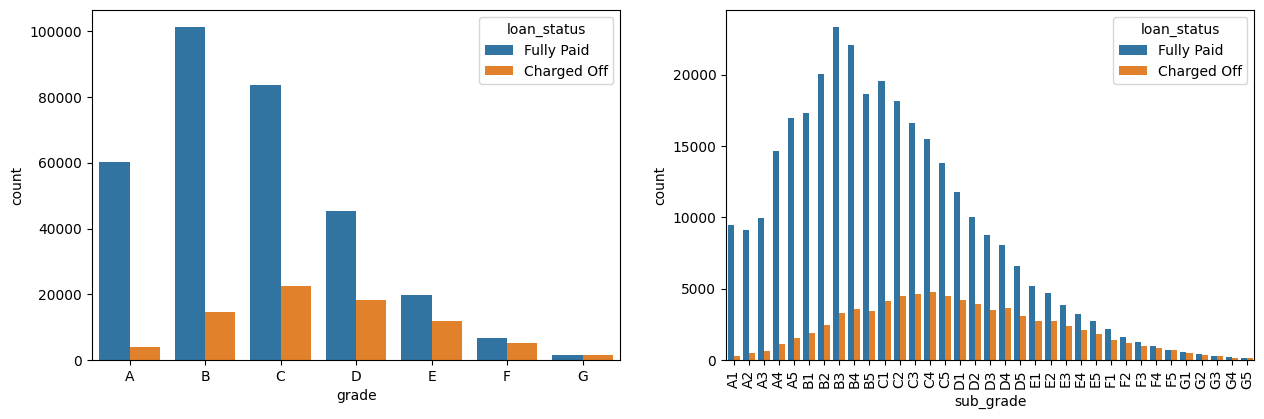

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Sepertinya subkelas F dan G tidak terlalu sering membayar. Isolasikan dan buat ulang countplot hanya untuk subkelas tersebut.

In [ ]:
df = data[(data.grade == 'F') | (data.grade == 'G')]
fig_grade1 = px.histogram(df, x='grade', color='loan_status',
                           template='plotly_white', barmode='group',opacity=1,
                           title="Loan Status by Grade").update_xaxes(categoryorder='total descending')
fig_grade1.show()
fig_subgrade1 = px.histogram(df, x='sub_grade', color='loan_status',
                           template='plotly_white', barmode='group',opacity=1,
                           title="Loan Status by SubGrade").update_xaxes(categoryorder='max descending')
fig_subgrade1.show()

Terlihat bahwa di kelas F dan G perbandingan antara yang melakukan pembayaran dan menunggak hampir sama

## `term`, `home_ownership`, `verification_status` & `purpose`

In [ ]:
data['home_ownership'].value_counts()


home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
fig_subgrade = px.histogram(data, x='home_ownership', color='loan_status',
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by home ownership").update_xaxes(categoryorder='max descending')
fig_subgrade.show()

In [ ]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

<ipython-input-813-62191b24ebc8>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



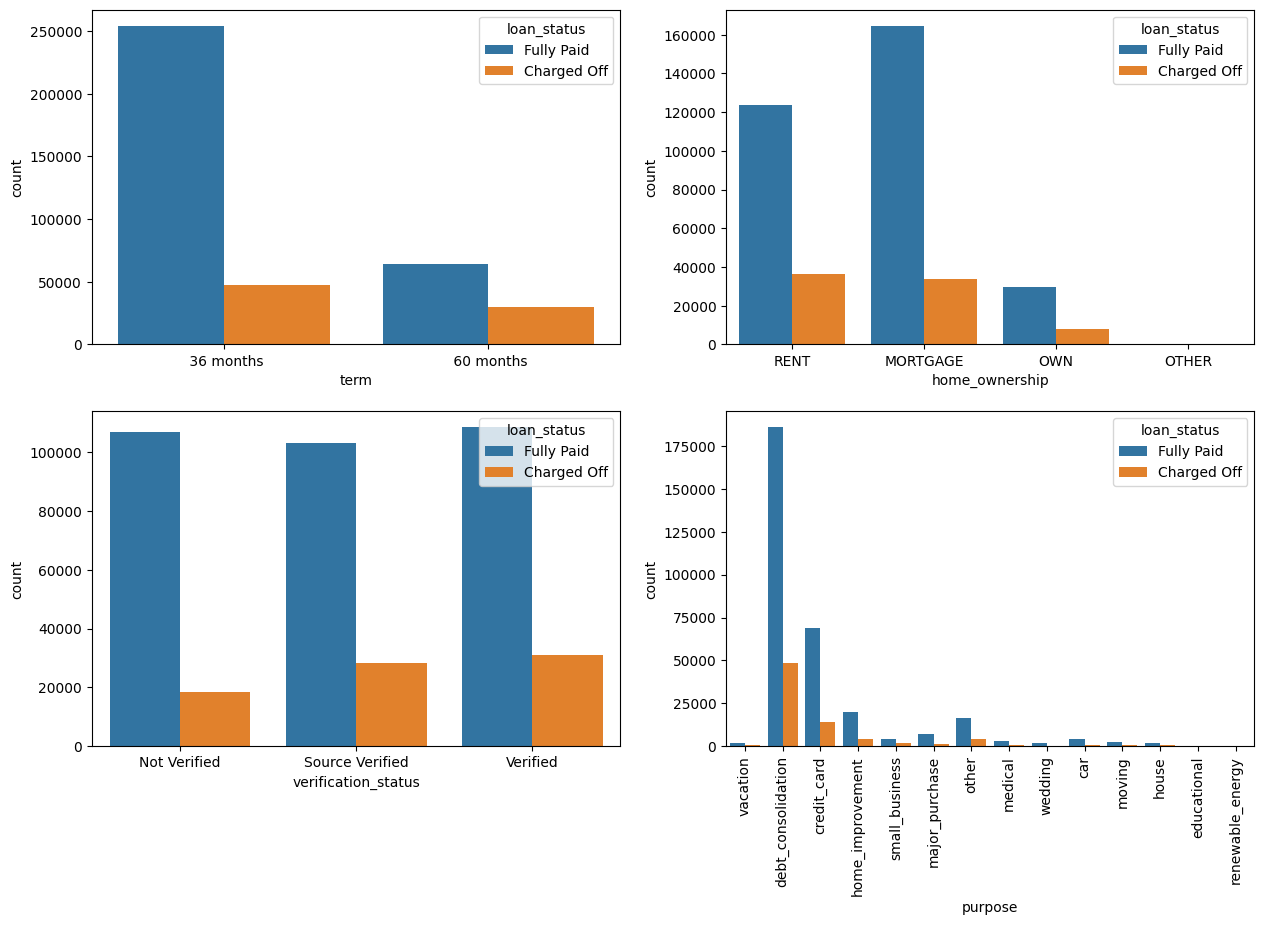

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [ ]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

## `int_rate` & `annual_inc`

> - `int_rate`: Tingkat ketertarikan pada pinjaman
> - `annual_inc`: Pendapatan tahunan peminjam

In [ ]:
fig_intrate = px.histogram(data, x='int_rate', color='loan_status', nbins=25,
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by int rate")
fig_intrate.show()
fig_annualinc= px.histogram(data, x='annual_inc', color='loan_status', nbins=50,
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by annual income")
fig_annualinc.show()

In [ ]:
df1 = data[(data.annual_inc <= 250000)]
fig_annualinc1= px.histogram(df1, x='annual_inc', color='loan_status', nbins=50,
                           template='plotly_white', barmode='overlay',opacity=1,
                           title="Loan Status by annual income")
fig_annualinc1.show()


In [ ]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [ ]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [ ]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

- Kelihatannya pinjaman dengan interest rate yang tinggi lebih mungkin untuk menunggak.
- Hanya 75 (bahkan kurang) peminjam yang memiliki pendapatan tahunan lebih dari 1 juta, dan 4077 peminjam yang memiliki pendapatan lebih dari 250k

## `emp_title` & `emp_length`

> - `emp_title`: Pekerjaan peminjam yang dicatatkan Ketika melakukan pinjaman.
> - `emp_length`: Lama bekerja dalam tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih

In [ ]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [ ]:
data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

In [ ]:
data['emp_length_int'].mean()

5.938577657526957

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    396030 non-null  float64       
 1   term                         396030 non-null  object        
 2   int_rate                     396030 non-null  float64       
 3   installment                  396030 non-null  float64       
 4   grade                        396030 non-null  object        
 5   sub_grade                    396030 non-null  object        
 6   emp_title                    373103 non-null  object        
 7   emp_length                   377729 non-null  object        
 8   home_ownership               396030 non-null  object        
 9   annual_inc                   396030 non-null  float64       
 10  verification_status          396030 non-null  object        
 11  issue_d                   

<ipython-input-824-0dd15ceb96a7>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



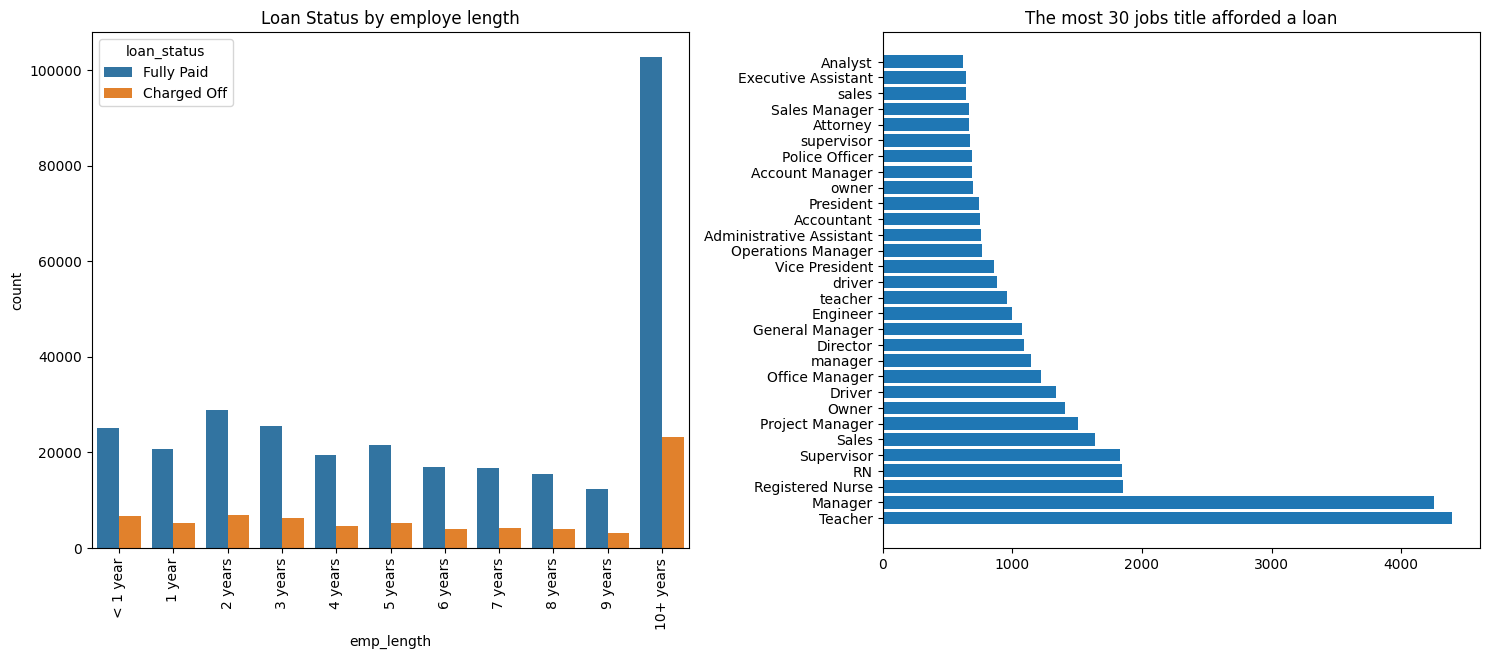

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
plt.title("Loan Status by employe length")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

- Terlihat bahwa peminjam didominasi oleh profesi guru dan manager
- Pemninjam paling banyak berasal dari pekerja yang berumur 10 tahun atau lebih

## Cek Categorical Features

### address

Kita akan menampilkan fitur untuk merekayasa kolom kode pos dari alamat dalam kumpulan data. Buat sebuah kolom bernama 'zip_code' yang mengekstrak kode pos dari kolom alamat.

In [ ]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [ ]:
data.zip_code.value_counts()

zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [ ]:
data.drop('address', axis=1, inplace=True)

In [ ]:
data.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              4
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48816
earliest_cr_line          684
initial_list_status         2
application_type            3
zip_code                   10
dtype: int64

#### Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sagat tinggi (high cardinality).

In [ ]:
data.drop(['emp_title','title'], axis=1, inplace=True)

In [ ]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                       1397
int_rate                         566
installment                    55706
annual_inc                     27197
dti                             4262
open_acc                          61
pub_rec                           20
revol_bal                      55622
revol_util                      1226
total_acc                        118
mort_acc                          33
pub_rec_bankruptcies               9
loan_stat                          2
emp_length_int                    11
term_int                           2
earliest_cr_line_date            684
mths_since_earliest_cr_line      673
issue_d_date                     115
mths_since_issue_d               113
dtype: int64

Terlihat semua data memiliki nilai unik paling tidak dua, sehingga tidak perlu dibuang

In [ ]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64


grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: float64


sub_grade
B3    6.730551
B4    6.464409
C1    5.974800
C2    5.701588
B2    5.680125
B5    5.576598
C3    5.358432
C4    5.120824
B1    4.843572
A5    4.677928
C5    4.606722
D1    4.038330
A4    3.986819
D2    3.522713
D3    3.086382
D4    2.943464
A3    2.670505
A1    2.456632
D5    2.449309
A2    2.415726
E1    1.999091
E2    1.876373
E3    1.567306
E4    1.353685
E5    1.154458
F1    0.892862
F2    0.698432
F3    0.577229
F4    0.451228
F5    0.352751
G1    0.267151
G2    0.190390
G3    0.139383
G4    0.094437
G5    0.079792
Name: proportion, dtype: float64


emp_length
10+ years    33.368103
2 years       9.484842
< 1 year      8.398879
3 years       8.382994
5 years       7.014288
1 year        6.852002
4 years       6.341054
6 years       5.517448
7

Variabel awal yang sudah dimodifikasi pada feature engineering sebelumnya juga dibuang

In [ ]:
data.drop(['loan_status','emp_length','term','earliest_cr_line','earliest_cr_line_date','issue_d','issue_d_date','mths_since_issue_d','grade'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396030 non-null  float64
 1   int_rate                     396030 non-null  float64
 2   installment                  396030 non-null  float64
 3   sub_grade                    396030 non-null  object 
 4   home_ownership               396030 non-null  object 
 5   annual_inc                   396030 non-null  float64
 6   verification_status          396030 non-null  object 
 7   purpose                      396030 non-null  object 
 8   dti                          396030 non-null  float64
 9   open_acc                     396030 non-null  float64
 10  pub_rec                      396030 non-null  float64
 11  revol_bal                    396030 non-null  float64
 12  revol_util                   395754 non-null  float64
 13 

## Missing Values

In [ ]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 23)


In [ ]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'
'emp_length_int': number of missing values '18301' ==> '4.621%'


### Missing Values Filling/Dropping

#### mort_acc

In [ ]:
data.mort_acc.value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [ ]:
data.mort_acc.isna().sum()

37795

In [ ]:
num_data=data.select_dtypes(exclude='object')

In [ ]:
print(num_data.corrwith(data['mort_acc']))

loan_amnt                      0.222315
int_rate                      -0.082583
installment                    0.193694
annual_inc                     0.236320
dti                           -0.025439
open_acc                       0.109205
pub_rec                        0.011552
revol_bal                      0.194925
revol_util                     0.007514
total_acc                      0.381072
mort_acc                       1.000000
pub_rec_bankruptcies           0.027239
loan_stat                      0.073111
emp_length_int                 0.198494
term_int                       0.096220
mths_since_earliest_cr_line    0.292013
dtype: float64


In [ ]:
corr = px.bar(num_data.corrwith(data['mort_acc']), title = 'mort acc', template = 'plotly_white',orientation='h')
corr.show()

Sepertinya fitur total_acc berkorelasi dengan mort_acc, ini masuk akal. Mari kita coba pendekatan fillna() ini. Kita akan mengelompokkan dataframe berdasarkan total_acc dan menghitung nilai rata-rata untuk mort_acc per entri total_acc. Untuk mendapatkan hasil di bawah ini:

In [ ]:
total_acc_avg = data.groupby(by='total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#### `emp_length_int`

In [ ]:
corr1 = px.bar(num_data.corrwith(data['emp_length_int']), title = 'employee length int', template = 'plotly_white',orientation='h')
corr1.show()

Karena fitur `emp_length_int` tidak memiliki korelasi yang tinggi terhadap variabel lain, maka kita isi baris yang kosong dengan nilai 0.

In [ ]:
data['emp_length_int'].fillna(0, inplace=True)

#### `revol_util` & `pub_rec_bankruptcies`

Kedua fitur ini memiliki data yang hilang, tetapi jumlahnya kurang dari 0,5% dari total data. Jadi kita akan menghapus baris-baris yang tidak memiliki nilai-nilai tersebut di kolom-kolom tersebut dengan dropna().

In [ ]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(395219, 23)

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    395219 non-null  float64
 1   int_rate                     395219 non-null  float64
 2   installment                  395219 non-null  float64
 3   sub_grade                    395219 non-null  object 
 4   home_ownership               395219 non-null  object 
 5   annual_inc                   395219 non-null  float64
 6   verification_status          395219 non-null  object 
 7   purpose                      395219 non-null  object 
 8   dti                          395219 non-null  float64
 9   open_acc                     395219 non-null  float64
 10  pub_rec                      395219 non-null  float64
 11  revol_bal                    395219 non-null  float64
 12  revol_util                   395219 non-null  float64
 13 

# Feature Scaling dan Transformation

## One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding

In [ ]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

   sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3          True         False         False         False         False   
4         False         False         False         False         False   

   sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  sub_grade_C1  ...  \
0         False         False          True         False         False  ...   
1         False         False         False          True         False  ...   
2         False          True         False         False         False  ...   
3         False         False         False         False         False  ...   
4         False         False         False         False         False  ...   

   application_type_JOINT  zip_code_05113  zip_code_11650  zip_code_

## Standarisasi

Semua kolom numerikal dilakukan proses standarisasi dengan MinMaxScaler.

In [ ]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['loan_stat']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
std = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

   loan_amnt  int_rate  installment  annual_inc       dti  open_acc  pub_rec  \
0   0.240506  0.238411     0.206493    0.013438  0.002624  0.168539      0.0   
1   0.189873  0.259836     0.164456    0.007466  0.002205  0.179775      0.0   
2   0.382278  0.201402     0.323437    0.004945  0.001279  0.134831      0.0   
3   0.169620  0.045578     0.134787    0.006202  0.000260  0.056180      0.0   
4   0.604430  0.465524     0.390880    0.006317  0.003395  0.134831      0.0   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0   0.020863    0.046845   0.154362  0.000000                   0.0   
1   0.011548    0.059733   0.167785  0.088235                   0.0   
2   0.006876    0.103328   0.161074  0.000000                   0.0   
3   0.003139    0.024095   0.073826  0.000000                   0.0   
4   0.014102    0.078225   0.275168  0.029412                   0.0   

   emp_length_int  term_int  mths_since_earliest_cr_line  
0             1.0       0.0      

In [ ]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    395219 non-null  float64
 1   int_rate                     395219 non-null  float64
 2   installment                  395219 non-null  float64
 3   annual_inc                   395219 non-null  float64
 4   dti                          395219 non-null  float64
 5   open_acc                     395219 non-null  float64
 6   pub_rec                      395219 non-null  float64
 7   revol_bal                    395219 non-null  float64
 8   revol_util                   395219 non-null  float64
 9   total_acc                    395219 non-null  float64
 10  mort_acc                     395219 non-null  float64
 11  pub_rec_bankruptcies         395219 non-null  float64
 12  emp_length_int               395219 non-null  float64
 13 

## Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi

In [ ]:
data_model = pd.concat([onehot, std, data[['loan_stat']]], axis=1)

# Modeling

## Train-Test_Split

In [ ]:
w_p = data_model.loan_stat.value_counts()[0] / data.shape[0]
w_n = data_model.loan_stat.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [ ]:
train, test = train_test_split(data_model, test_size=0.3, random_state=42)

print(train.shape)
print(test.shape)

(276653, 80)
(118566, 80)


## Removing Outliers

In [ ]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(276653, 80)
(276653, 80)


In [ ]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(276653, 80)
(276653, 80)


## Pisahkan X dan y

In [ ]:
X_train, y_train = train.drop('loan_stat', axis=1), train.loan_stat
X_test, y_test = test.drop('loan_stat', axis=1), test.loan_stat

In [ ]:
X_train.dtypes

sub_grade_A2                      bool
sub_grade_A3                      bool
sub_grade_A4                      bool
sub_grade_A5                      bool
sub_grade_B1                      bool
                                ...   
mort_acc                       float64
pub_rec_bankruptcies           float64
emp_length_int                 float64
term_int                       float64
mths_since_earliest_cr_line    float64
Length: 79, dtype: object

In [ ]:
X_train.shape, X_test.shape

((276653, 79), (118566, 79))

## Training

Algoritma yang digunakan untuk pemodelan adalah XGBOOST



In [ ]:
from xgboost import XGBClassifier

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
xgbc = XGBClassifier(use_label_encoder=False)
xgbc.fit(X_train, y_train)

y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.65%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.944410       0.890908  0.896495       0.917659       0.901411
recall         0.502348       0.992777  0.896495       0.747562       0.896495
f1-score       0.655842       0.939088  0.896495       0.797465       0.883480
support    54313.000000  222340.000000  0.896495  276653.000000  276653.000000
_______________________________________________
Confusion Matrix: 
 [[ 27284  27029]
 [  1606 220734]]

Test Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.907532      0.886683  0.888847       0.897107       0.890764
recall         0.481215      0.9
...[output truncated for GitHub size]...


# Validation

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

## AUC

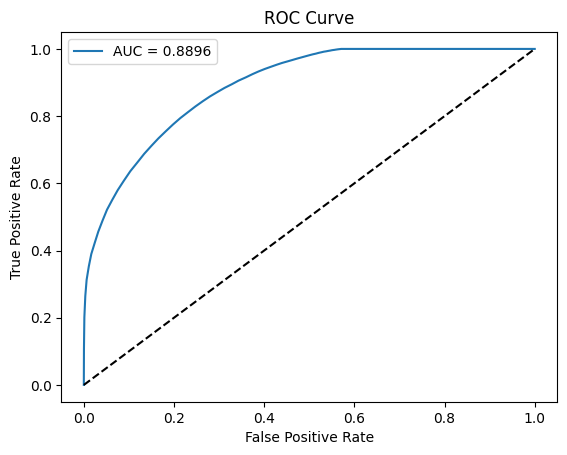

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## KS

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [ ]:
df_actual_predicted.head()

    index  y_actual  y_pred_proba  Cumulative N Population  Cumulative N Bad  \
0  177245         0           0.0                        1                 0   
1   88813         0           0.0                        2                 0   
2  132025         0           0.0                        3                 0   
3  174696         0           0.0                        4                 0   
4  145237         0           0.0                        5                 0   

   Cumulative N Good  Cumulative Perc Population  Cumulative Perc Bad  \
0                  1                    0.000008                  0.0   
1                  2                    0.000017                  0.0   
2                  3                    0.000025                  0.0   
3                  4                    0.000034                  0.0   
4                  5                    0.000042                  0.0   

   Cumulative Perc Good  
0              0.000043  
1              0.000086  
2 

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5816')

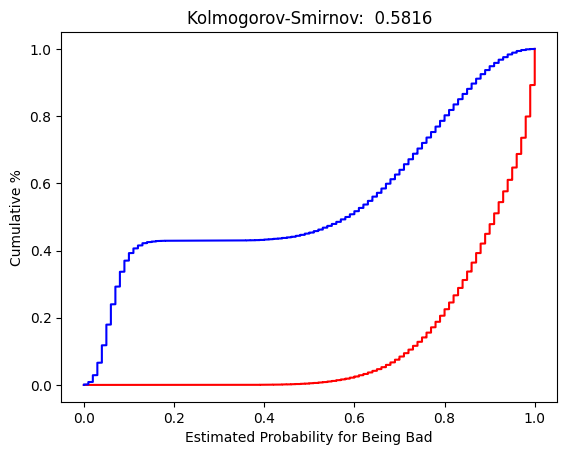

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.89` dan `KS = 0.58`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.